In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl
prefix='kernels'
!rm {prefix}*.h5

In [15]:
mat = 80
snr = 50
nchan = 4
!riesling phantom {prefix} --shepp_logan --matrix={mat} --snr={snr} --channels={nchan} --os=2.5
!riesling sdc --sdc=pipenn {prefix}.h5
!riesling sense-calib --sdc={prefix}-sdc.h5 {prefix}.h5 --fov=256

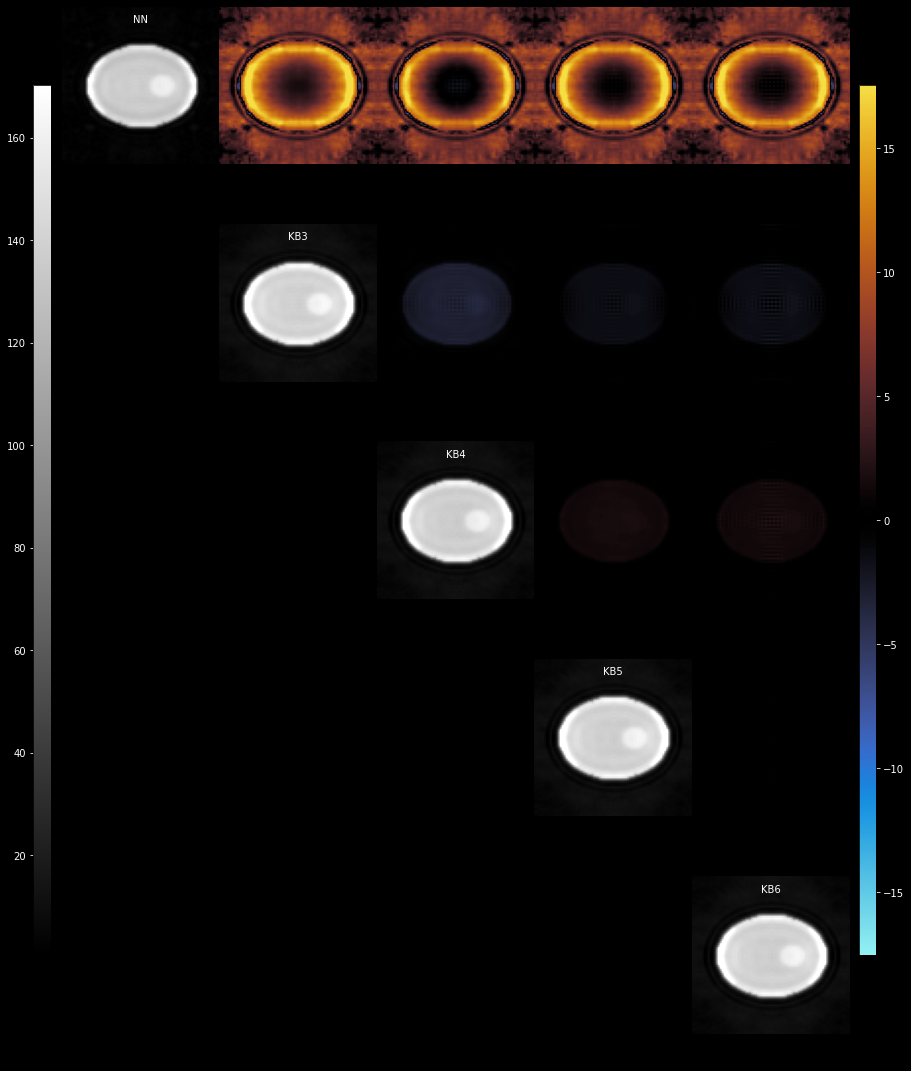

In [16]:
recon = f'--sense={prefix}-sense.h5 --sdc={prefix}-sdc.h5'
!riesling recon {recon} --kernel=NN {prefix}.h5 -o {prefix}-NN
!riesling recon {recon} --kernel=KB3 {prefix}.h5 -o {prefix}-KB3
!riesling recon {recon} --kernel=KB4 {prefix}.h5 -o {prefix}-KB4
!riesling recon {recon} --kernel=KB5 {prefix}.h5 -o {prefix}-KB5
!riesling recon {recon} --kernel=KB6 {prefix}.h5 -o {prefix}-KB6
rl.images.diffN([f'{prefix}-NN-recon.h5',f'{prefix}-KB3-recon.h5',f'{prefix}-KB4-recon.h5',f'{prefix}-KB5-recon.h5',f'{prefix}-KB6-recon.h5'],
                titles=['NN','KB3','KB4','KB5','KB6'])


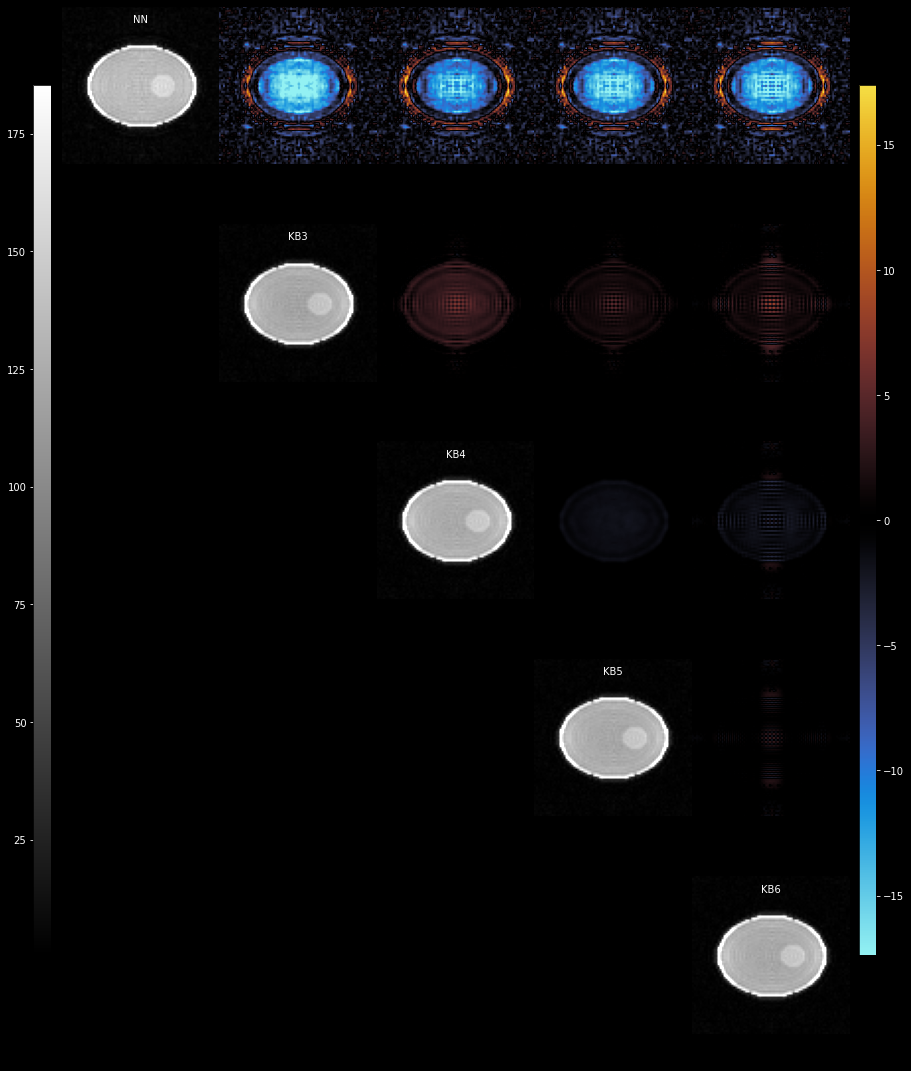

In [17]:
recon = f'--sense={prefix}-sense.h5 --sdc={prefix}-sdc.h5 --cg_its=4'
!riesling cg {recon} --kernel=NN {prefix}.h5 -o {prefix}-NN
!riesling cg {recon} --kernel=KB3 {prefix}.h5 -o {prefix}-KB3
!riesling cg {recon} --kernel=KB4 {prefix}.h5 -o {prefix}-KB4
!riesling cg {recon} --kernel=KB5 {prefix}.h5 -o {prefix}-KB5
!riesling cg {recon} --kernel=KB6 {prefix}.h5 -o {prefix}-KB6
rl.images.diffN([f'{prefix}-NN-cg.h5',f'{prefix}-KB3-cg.h5',f'{prefix}-KB4-cg.h5',f'{prefix}-KB5-cg.h5',f'{prefix}-KB6-cg.h5'],
                titles=['NN','KB3','KB4','KB5','KB6'])